In [2]:
import pandas as pd
import numpy as np

## load DataSet

In [80]:
data = pd.read_csv('train.csv')

In [81]:
data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [82]:
data[data.hand==9]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
10087,1,10,1,11,1,13,1,12,1,1,9
14886,4,1,4,13,4,12,4,11,4,10,9
15757,3,12,3,11,3,13,3,10,3,1,9
16718,4,10,4,11,4,1,4,13,4,12,9
23726,2,11,2,13,2,10,2,12,2,1,9



# Feature Engineering

In [83]:
X = data.iloc[::,:-1]
y = data.iloc[::,-1]


In [84]:
cards_ind = ['C1','C2','C3','C4','C5']
suits_ind = ['S1','S2','S3','S4','S5']    

In [85]:
a = X[cards_ind]
vals = a.get_values()
vals.sort()

In [86]:
sorted_cards = pd.DataFrame(vals,columns=cards_ind)
sorted_data = data.drop(cards_ind,axis=1)
sorted_data[cards_ind] = sorted_cards

In [87]:
Suits_diff = sorted_data[suits_ind].max(axis=1) - sorted_data[suits_ind].min(axis=1)
Cards_std = sorted_data[cards_ind[:-1]].std(axis=1).astype(int)

In [88]:
#Cards_std

In [89]:
sorted_data['Suits_diff'] = Suits_diff
sorted_data['Cards_std'] = Cards_std

In [90]:
feature_cols_best = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5','Suits_diff']
feature_cols_test = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5','Suits_diff','Cards_std']
#feature_cols = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5',''Cards_std'']
X = sorted_data[feature_cols_test]
y = sorted_data['hand']

In [13]:
X.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Suits_diff,Cards_std
0,4,1,2,2,2,7,4,8,2,9,2,3
1,1,4,3,6,1,7,3,11,2,12,2,2
2,1,1,4,1,3,7,4,11,2,11,3,4
3,2,4,2,6,3,9,1,9,4,9,3,2
4,1,1,2,2,2,4,2,8,2,11,1,3


----------------------------------------------------
# Split Data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18757, 12)
(6253, 12)
(18757,)
(6253,)


In [17]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
y_pred_class = dTree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.95841995842


In [ ]:

# read in data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

In [22]:
import xgboost as xgb

In [23]:
2+2

4

In [76]:

gbm = xgb.XGBClassifier(
 #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)
predictions = gbm.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

0.984327522789


In [77]:
conf_mat = metrics.confusion_matrix(y_test, predictions)
print(conf_mat)

[[3103    0    0    0    0    0    0    0    0    0]
 [   0 2667    2    2    5    0    0    0    0    0]
 [   0   54  247    0    0    0    0    0    0    0]
 [   0   13    1  103    0    0    1    0    0    0]
 [   5    6    0    0   15    0    0    0    0    0]
 [   0    0    0    0    0   18    0    0    0    0]
 [   0    0    5    1    0    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0    0    1]]


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]


C:\Users\nazar\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


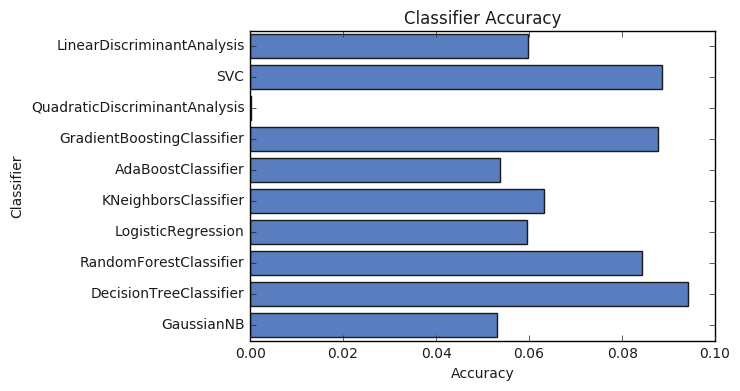

In [135]:
%matplotlib inline

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)



acc_dict = {}


for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)

    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [204]:
sorted_data.head()

,S1,S2,S3,S4,S5,hand,C1,C2,C3,C4,C5
0,4,2,2,4,2,0,1,2,4,7,8
1,1,3,1,3,2,0,4,6,7,11,12
2,1,4,3,4,2,2,1,1,7,11,11
3,2,2,3,1,4,3,4,6,9,9,11
4,1,2,2,2,2,0,2,4,8,11,12


In [279]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_class)
print(conf_mat)

[[3074   24    0    2    2    1    0    0    0    0]
 [  22 2531  101   13    8    0    1    0    0    0]
 [   0   93  205    2    1    0    0    0    0    0]
 [   0   16    5   91    0    0    6    0    0    0]
 [   0    1    0    0   25    0    0    0    0    0]
 [  11    0    0    0    0    7    0    0    0    0]
 [   0    1    3    1    0    0    1    0    0    0]
 [   0    0    0    3    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    1]]


In [275]:
y_pred_class = dTree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.949144410683


In [149]:
y_test.value_counts()

0    3103
1    2676
2     301
3     118
4      26
5      18
6       6
7       3
9       1
8       1
Name: hand, dtype: int64

In [150]:
pd.Series(y_pred_class).value_counts()

0    3141
1    2655
2     308
3     105
4      27
6       7
5       5
7       2
8       2
9       1
dtype: int64

In [1]:
y_pred_class

NameError: name 'y_pred_class' is not defined

In [33]:
test_data = pd.read_csv('test.csv')

In [36]:
id_hand = test_data.id

In [32]:
gbm.fit(X, y)

#print(metrics.accuracy_score(y_test, predictions))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.9, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=2000, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [40]:
cards_ind = ['C1','C2','C3','C4','C5']
suits_ind = ['S1','S2','S3','S4','S5']   

a = test_data[cards_ind]
vals = a.get_values()
vals.sort()

sorted_cards = pd.DataFrame(vals,columns=cards_ind)
sorted_data = test_data.drop(cards_ind,axis=1)
sorted_data[cards_ind] = sorted_cards

Suits_diff = sorted_data[suits_ind].max(axis=1) - sorted_data[suits_ind].min(axis=1)
Cards_std = sorted_data[cards_ind[:-1]].std(axis=1).astype(int)

sorted_data['Suits_diff'] = Suits_diff
sorted_data['Cards_std'] = Cards_std

#feature_cols_best = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5','Suits_diff']
feature_cols = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5','Suits_diff','Cards_std']
#feature_cols = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5',''Cards_std'']
X = sorted_data[feature_cols]

['C1', 'C2', 'C3', 'C4']

In [42]:
X.shape

(1000000, 12)

In [44]:
predictions = gbm.predict(X)

In [50]:
StackingSubmission = pd.DataFrame({'id': id_hand})
StackingSubmission['hand'] = predictions  

In [52]:

StackingSubmission.to_csv("StackingSubmission.csv", index=False)

In [62]:
StackingSubmission[StackingSubmission.hand==9]

,id,hand
440230,440231,9
588350,588351,9
794296,794297,9


In [75]:
X.iloc[440230]

S1             4
C1             1
S2             4
C2            10
S3             4
C3            11
S4             4
C4            12
S5             4
C5            13
Suits_diff     0
Cards_std      5
Name: 440230, dtype: int64